In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
VehicleDF = pd.read_excel('Dataset.xlsx', sheet_name='Trip')
ChargingDF = pd.read_excel('Dataset.xlsx', sheet_name='Charge Cycle')

In [94]:
ChargingDF['Local Charge Start Time'] = pd.to_datetime(ChargingDF['Local Charge Start Time'],
                                                       format='mixed')
ChargingDF['Local Charge End Time'] = pd.to_datetime(ChargingDF['Local Charge End Time'],
                                                     format='mixed')
VehicleDF['Local Trip Start Time'] = pd.to_datetime(VehicleDF['Local Trip Start Time'],
                                                    format='mixed')
VehicleDF['Local Trip End Time'] = pd.to_datetime(VehicleDF['Local Trip End Time'],
                                                  format='mixed')

In [95]:
characteristics = pd.concat([ChargingDF.isnull().sum(), 
                             ChargingDF.notnull().sum(), 
                             ChargingDF.nunique(), 
                             ChargingDF.dtypes],
                        keys=['Null Values', 
                              'Available Values', 
                              'Unique Values', 
                              'Data Types'],
                        axis=1)
characteristics

,Null Values,Available Values,Unique Values,Data Types
Vehicle ID,0,6296,8,object
Local Charge Start Time,0,6296,6269,datetime64[ns]
Local Charge End Time,0,6296,6263,datetime64[ns]
Starting SOC,0,6296,170,float64
Ending SOC,0,6296,120,float64
Total Energy Delivered,0,6296,5705,float64
Average Power,0,6296,6210,float64
Max Power,0,6296,4371,float64


In [96]:
characteristics = pd.concat([VehicleDF.isnull().sum(), 
                             VehicleDF.notnull().sum(), 
                             VehicleDF.nunique(), 
                             VehicleDF.dtypes],
                        keys=['Null Values', 
                              'Available Values', 
                              'Unique Values', 
                              'Data Types'],
                        axis=1)
characteristics

,Null Values,Available Values,Unique Values,Data Types
Vehicle ID,0,2376,8,object
Local Trip Start Time,0,2376,2357,datetime64[ns]
Local Trip End Time,0,2376,2351,datetime64[ns]
Initial SOC,0,2376,98,float64
Final SOC,0,2376,160,float64
SOC Used,0,2376,180,float64
Total Energy Consumption,0,2376,2318,float64
Total Distance,0,2376,2166,float64
Average Ambient Temperature,0,2376,203,float64


In [97]:
VehicleDF

,Vehicle ID,Local Trip Start Time,Local Trip End Time,Initial SOC,Final SOC,SOC Used,Total Energy Consumption,Total Distance,Average Ambient Temperature
0,EV026,2018-09-28 16:39:00,2018-09-19 16:41:00,87.5,87.0,0.5,0.116,0.001,94.64
1,EV026,2018-09-18 18:21:00,2018-09-18 18:22:00,87.5,87.0,0.5,0.131,0.072,78.80
2,EV026,2018-09-18 17:59:00,2018-09-18 18:02:00,91.0,90.0,1.0,0.283,0.033,79.52
3,EV026,2018-09-18 17:03:00,2018-09-18 17:12:00,93.5,91.0,2.5,1.069,0.130,90.32
4,EV026,2018-09-18 10:51:00,2018-09-18 11:13:00,100.0,93.0,7.0,4.873,2.703,76.28
...,...,...,...,...,...,...,...,...,...
2371,EV035,2018-01-03 12:30:00,2018-01-03 13:45:00,87.0,66.0,21.0,24.646,10.874,57.20
2372,EV035,2018-01-03 10:20:00,2018-01-03 11:51:00,87.5,73.0,14.5,33.627,13.927,56.84
2373,EV035,2018-01-03 08:05:00,2018-01-03 08:50:00,97.5,57.5,40.0,22.912,10.839,48.56
2374,EV035,2018-01-02 15:05:00,2018-01-02 16:54:00,96.5,56.0,40.5,42.413,19.108,59.72


In [98]:
ChargingDF['Charging Duration'] = (ChargingDF['Local Charge End Time'] - ChargingDF['Local Charge Start Time']).dt.total_seconds()
ChargingDF['Total SOC Charged'] = (ChargingDF['Ending SOC'] - ChargingDF['Starting SOC'])
ChargingDF

,Vehicle ID,Local Charge Start Time,Local Charge End Time,Starting SOC,Ending SOC,Total Energy Delivered,Average Power,Max Power,Charging Duration,Total SOC Charged
0,EV026,2018-08-10 18:48:00,2018-08-10 18:52:00,81.0,99.5,13.910,193.386,342.28,240.0,18.5
1,EV026,2018-08-10 18:14:00,2018-08-10 18:20:00,65.0,100.0,24.091,308.800,363.64,360.0,35.0
2,EV026,2018-08-10 17:11:00,2018-08-10 17:19:00,57.5,100.0,31.054,327.830,364.82,480.0,42.5
3,EV026,2018-08-10 16:04:00,2018-08-10 16:09:00,62.5,99.5,25.935,321.533,361.06,300.0,37.0
4,EV026,2018-08-10 15:02:00,2018-08-10 15:10:00,56.5,100.0,32.010,230.942,360.10,480.0,43.5
...,...,...,...,...,...,...,...,...,...,...
6291,EV035,2018-01-12 09:40:00,2018-01-12 09:43:00,44.5,61.0,12.709,272.881,315.78,180.0,16.5
6292,EV035,2018-01-12 09:27:00,2018-01-12 09:29:00,36.5,48.0,8.686,254.165,333.96,120.0,11.5
6293,EV035,2018-01-02 13:25:00,2018-01-02 13:47:00,56.5,56.0,0.523,-1.466,-1.44,1320.0,-0.5
6294,EV035,2018-01-02 12:45:00,2018-01-02 13:00:00,47.0,46.0,0.163,-0.770,-0.74,900.0,-1.0


In [123]:
VehicleDF['Energy Efficiency'] = round(VehicleDF['SOC Used'] / VehicleDF['Total Distance'], 2)
VehicleDF['Trip Duration'] = (VehicleDF['Local Trip End Time'] - VehicleDF['Local Trip Start Time']).dt.total_seconds() / 3600

In [124]:
round(VehicleDF,4)

,Vehicle ID,Local Trip Start Time,Local Trip End Time,Initial SOC,Final SOC,SOC Used,Total Energy Consumption,Total Distance,Average Ambient Temperature,Energy Efficiency,Trip Duration
2375,EV035,2018-01-02 10:01:00,2018-01-02 12:47:00,99.0,74.5,24.5,51.316,25.636,57.92,0.96,2.7667
2374,EV035,2018-01-02 15:05:00,2018-01-02 16:54:00,96.5,56.0,40.5,42.413,19.108,59.72,2.12,1.8167
2373,EV035,2018-01-03 08:05:00,2018-01-03 08:50:00,97.5,57.5,40.0,22.912,10.839,48.56,3.69,0.7500
2372,EV035,2018-01-03 10:20:00,2018-01-03 11:51:00,87.5,73.0,14.5,33.627,13.927,56.84,1.04,1.5167
2371,EV035,2018-01-03 12:30:00,2018-01-03 13:45:00,87.0,66.0,21.0,24.646,10.874,57.20,1.93,1.2500
...,...,...,...,...,...,...,...,...,...,...,...
472,EV029,2018-09-30 07:54:00,2018-09-30 12:34:00,87.5,62.0,25.5,142.801,67.403,68.00,0.38,4.6667
471,EV029,2018-09-30 12:49:00,2018-09-30 13:38:00,100.0,57.5,42.5,30.389,14.126,82.40,3.01,0.8167
470,EV029,2018-09-30 13:48:00,2018-09-30 15:41:00,100.0,56.0,44.0,55.311,26.862,83.84,1.64,1.8833
469,EV029,2018-09-30 15:55:00,2018-09-30 17:41:00,100.0,58.0,42.0,54.653,26.827,78.80,1.57,1.7667


In [125]:
VehicleDF.sort_values(by=['Local Trip Start Time'], inplace=True)

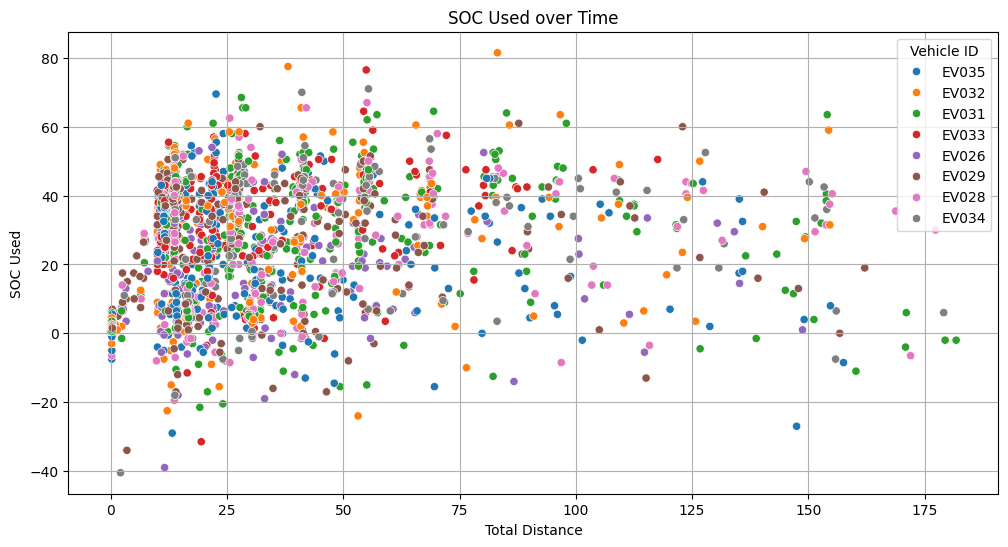

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=VehicleDF,
    x='Total Distance',
    y='SOC Used',
    hue='Vehicle ID',
    marker='o'
)

plt.title('SOC Used over Time')
plt.xlabel('Total Distance')
plt.ylabel('SOC Used')
plt.legend(title='Vehicle ID')
plt.grid(True)
plt.show()

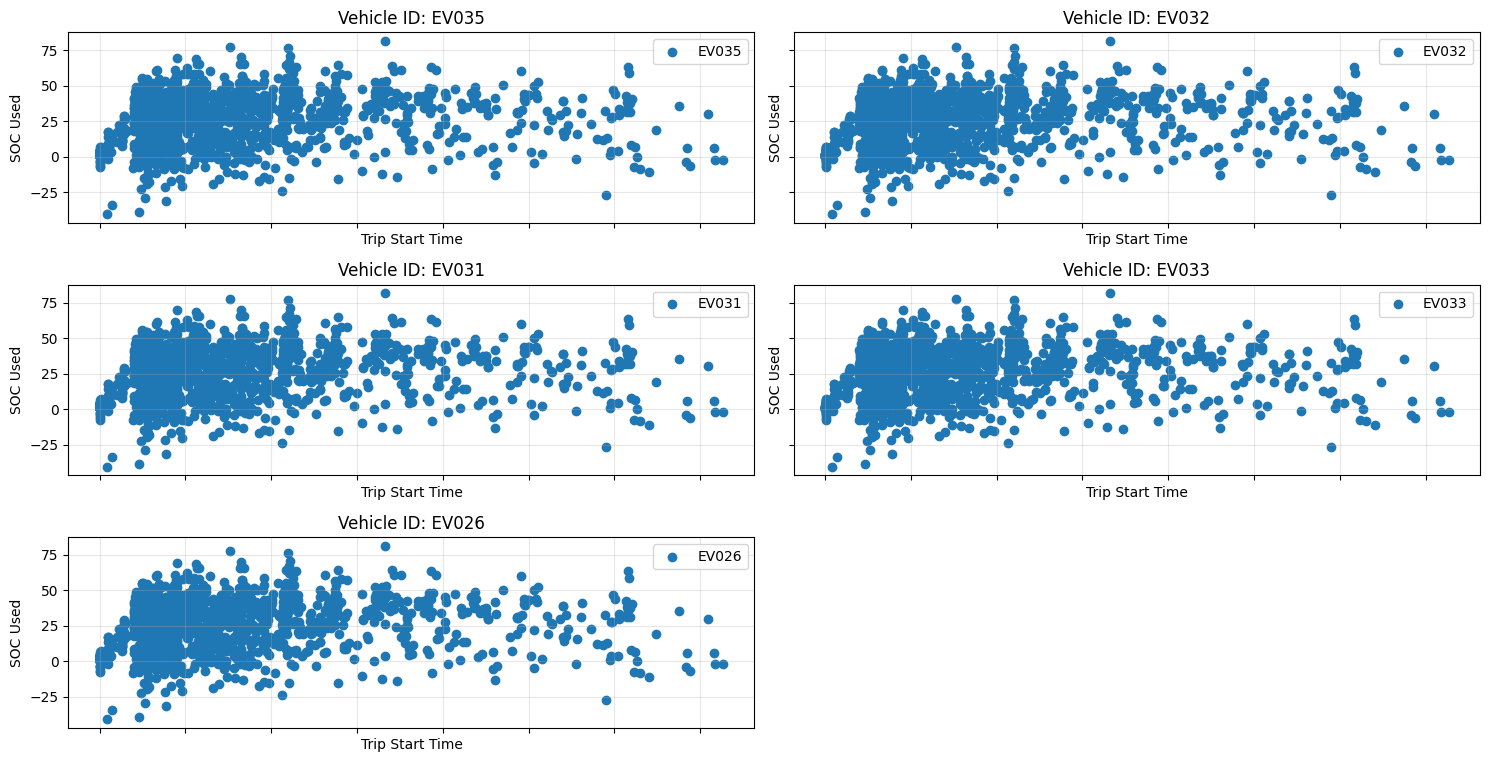

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10),
                         sharex=True, sharey=True)
axes = axes.flatten()

IDs = VehicleDF['Vehicle ID'].unique()

for idx, IDs in enumerate(IDs):
    ax = axes[idx]
    ax.scatter(VehicleDF['Total Distance'],
            VehicleDF['SOC Used'], marker='o',
            label=f'{IDs}')
    ax.set_title(f'Vehicle ID: {IDs}')
    ax.set_xlabel('Trip Start Time')
    ax.set_ylabel('SOC Used')
    ax.legend()
    ax.grid(True, alpha=0.3)


for idx in range(len(IDs), len(axes)):
    fig.delaxes(axes[idx])


plt.tight_layout()
plt.show()

In [ ]:
Sample = VehicleDF[VehicleDF['Vehicle ID'] == 'EV026']
Sample.sort_values(by=['Local Trip Start Time'], inplace=True)
Sample = Sample[Sample['Total Distance'] >= 0]
Sample = Sample[Sample['Trip Duration'] >= 0]

C:\Users\us392\AppData\Local\Temp\ipykernel_21564\3289590604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sample.sort_values(by=['Local Trip Start Time'], inplace=True)


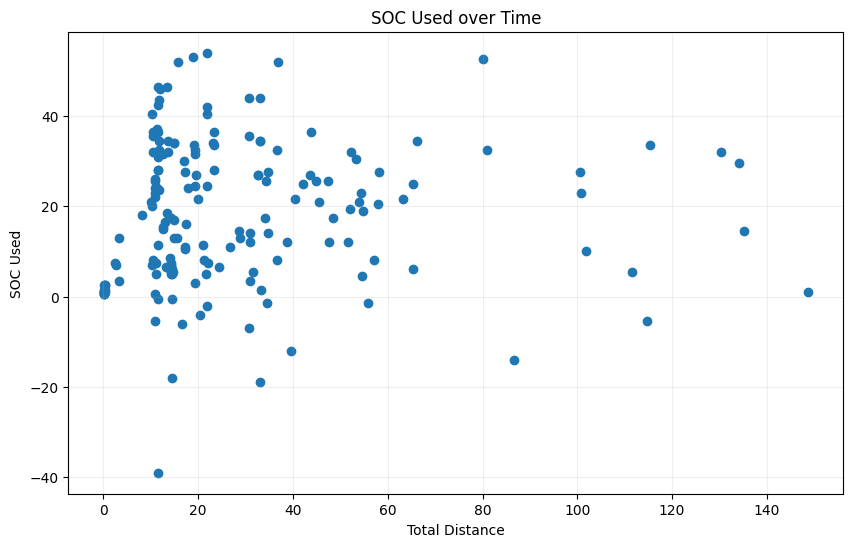

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(Sample['Total Distance'], Sample['SOC Used'],
         marker='o', label ='EV026')
plt.title('SOC Used over Time')
plt.xlabel('Total Distance')
plt.ylabel('SOC Used')
plt.grid(True, alpha=0.2)

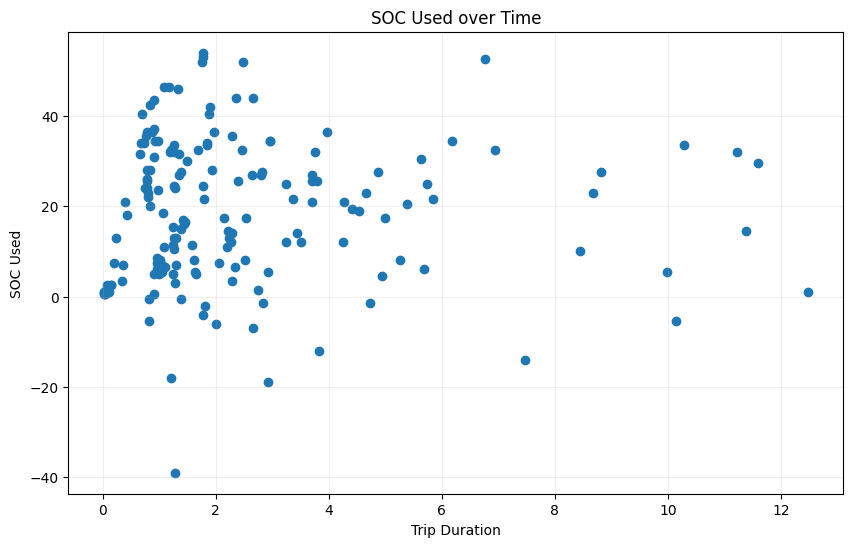

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(Sample['Trip Duration'], Sample['SOC Used'],
         marker='o', label ='EV026')
plt.title('SOC Used over Time')
plt.xlabel('Trip Duration')
plt.ylabel('SOC Used')
plt.grid(True, alpha=0.2)

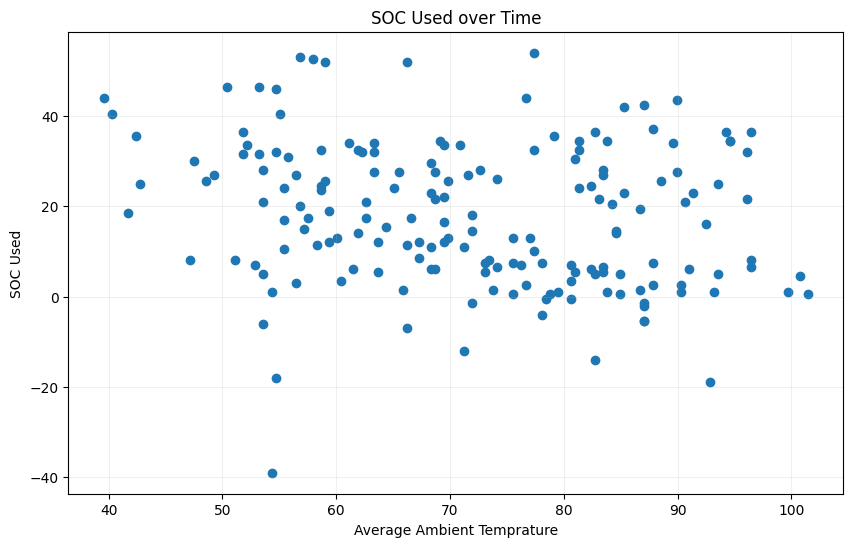

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(Sample['Average Ambient Temperature'], Sample['SOC Used'],
         marker='o', label ='EV026')
plt.title('SOC Used over Time')
plt.xlabel('Average Ambient Temprature')
plt.ylabel('SOC Used')
plt.grid(True, alpha=0.2)